# 定数係数線形常微分方程式(非斉次)

* Author: 黒木玄
* Date: 2019-04-23～2019-06-05
* Repository: https://github.com/genkuroki/DifferentialEquations
$
\newcommand\ds{\displaystyle}
\newcommand\Z{{\mathbb Z}}
\newcommand\R{{\mathbb R}}
\newcommand\C{{\mathbb C}}
\newcommand\eps{\varepsilon}
\newcommand\QED{\text{□}}
\newcommand\d{\partial}
\newcommand\real{\operatorname{Re}}
\newcommand\imag{\operatorname{Im}}
\newcommand\tr{\operatorname{tr}}
$

このファイルは [nbviewer](https://nbviewer.jupyter.org/github/genkuroki/DifferentialEquations/blob/master/08-1%20Linear%20inhomogeneous%20ODEs%20with%20constant%20coefficients.ipynb) でも閲覧できる.

[Julia言語](https://julialang.org/) と [Jupyter環境](https://jupyter.org/) の簡単な解説については次を参照せよ:

* [JuliaとJupyterのすすめ](https://nbviewer.jupyter.org/github/genkuroki/msfd28/blob/master/msfd28genkuroki.ipynb?flush_cached=true)

[Julia言語](https://julialang.org/) 環境の整備の仕方については次を参照せよ:

* [Julia v1.1.0 の Windows 8.1 へのインストール](https://nbviewer.jupyter.org/github/genkuroki/msfd28/blob/master/install.ipynb)

[Wolfram言語](http://www.wolfram.com/language/fast-introduction-for-programmers/ja/) 環境の整備の仕方については次を参照せよ:

* [Free Wolfram EngineをJupyterで使う方法](https://nbviewer.jupyter.org/github/genkuroki/msfd28/blob/master/Free%20Wolfram%20Engine.ipynb)

**注意:** このノートブックの出力結果は [Free Wolfram EngineをJupyterで使う方法](https://nbviewer.jupyter.org/github/genkuroki/msfd28/blob/master/Free%20Wolfram%20Engine.ipynb) に書いてある修正を [OutputHandlingUtilities.wl の toOutText 函数](https://github.com/WolframResearch/WolframLanguageForJupyter/blob/master/WolframLanguageForJupyter/Resources/OutputHandlingUtilities.wl#L123-L136) に施した場合にのみ得られる出力である. 例えば, `<pre>`～`</pre>` で囲んである部分を `$$`～`$$` で囲むように修正している.

In [1]:
JupyterImageResolution = 84;
JupyterOutTextForm = "TeX";

TeX[x_] := ToString[TeXForm[x]]
TeX[x_, y__] := StringJoin[TeX[x], TeX[y]]
TeXRaw[x__, y_] := StringJoin[x, TeX[y]]

MappedBy[x_] := x
MappedBy[x_, F___, G_] := MappedBy[x, F] // G

SetAttributes[TeXEq, HoldFirst]
TeXEq[x_] := TeX[HoldForm[x] == MappedBy[x, ReleaseHold, FullSimplify]]
TeXEq[x_, F__] := TeX[HoldForm[x] == MappedBy[x, ReleaseHold, F]]

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#非斉次の定数係数線形常微分方程式" data-toc-modified-id="非斉次の定数係数線形常微分方程式-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>非斉次の定数係数線形常微分方程式</a></span><ul class="toc-item"><li><span><a href="#斉次な場合の一般解" data-toc-modified-id="斉次な場合の一般解-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>斉次な場合の一般解</a></span><ul class="toc-item"><li><span><a href="#例:-斉次調和振動子" data-toc-modified-id="例:-斉次調和振動子-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>例: 斉次調和振動子</a></span></li></ul></li><li><span><a href="#非斉次な場合の一般解" data-toc-modified-id="非斉次な場合の一般解-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>非斉次な場合の一般解</a></span><ul class="toc-item"><li><span><a href="#非斉次な調和振動子" data-toc-modified-id="非斉次な調和振動子-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>非斉次な調和振動子</a></span></li><li><span><a href="#共振" data-toc-modified-id="共振-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>共振</a></span></li><li><span><a href="#共振再論" data-toc-modified-id="共振再論-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>共振再論</a></span></li></ul></li></ul></li><li><span><a href="#非斉次な波動方程式-(より高級な話題)" data-toc-modified-id="非斉次な波動方程式-(より高級な話題)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>非斉次な波動方程式 (より高級な話題)</a></span><ul class="toc-item"><li><span><a href="#解の表示" data-toc-modified-id="解の表示-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>解の表示</a></span></li><li><span><a href="#Fourier変換に関する公式" data-toc-modified-id="Fourier変換に関する公式-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Fourier変換に関する公式</a></span></li><li><span><a href="#非斉次な波動方程式のFourier変換による解法" data-toc-modified-id="非斉次な波動方程式のFourier変換による解法-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>非斉次な波動方程式のFourier変換による解法</a></span></li></ul></li></ul></div>

## 非斉次の定数係数線形常微分方程式

斉次の定数係数線形常微分方程式とは, 定数 $p_1,p_2,\ldots,p_n$ に関する

$$
u^{(n)}(x) + p_{n-1}u^{(n-1)}(x) + \cdots + p_1 u'(x) + p_0 u(x) = 0
\tag{$*$}
$$

の形の微分方程式のことである. 

非斉次の定数係数線形常微分方程式とは, 定数 $p_1,p_2,\ldots,p_n$ と任意函数 $f(x)$ に関する

$$
u^{(n)}(x) + p_{n-1}u^{(n-1)}(x) + \cdots + p_1 u'(x) + p_0 u(x) = f(x)
\tag{$**$}
$$

の形の微分方程式のことである. 右辺が $0$ ではなく $f(x)$ であることが斉次の場合と異なる. この微分方程式は

$$
w(x) = \begin{bmatrix}
u_0(x) \\ u_1(x) \\ \vdots \\ u_{n-2}(x) \\ u_{n-1}(x) \\
\end{bmatrix} =
\begin{bmatrix}
u(x) \\ u'(x) \\ \vdots \\ u^{(n-2)}(x) \\ u^{(n-1)}(x) \\
\end{bmatrix}, \qquad
b(x) = \begin{bmatrix}
0 \\ 0 \\ \vdots \\ 0 \\ f(x) \\
\end{bmatrix}
$$

とおけば

$$
u_0' = u_1,\; \ldots,\; u_{n-2}' = u_{n-1},\;
u_{n-1}' = u^{(n)} = -p_{n-1}u_{n-1}-\cdots-p_1 u_1 - p_0 u_0 
$$

なので次のように書き直される:

$$
\frac{dw(x)}{dx} = Au(x) + b(x).
\tag{$**'$}
$$

ここで

$$
A = \begin{bmatrix}
0   & 1  & & & \\
    & 0  & \ddots & & \\ 
    &    & \ddots & 1 & \\
-p_0&-p_1& \cdots & -p_{n-2} & -p_{n-1} \\
\end{bmatrix}
$$

とおいた. 

斉次な定数係数線形常微分方程式 ($*$) は

$$
\frac{dw(x)}{dx} = Au(x).
\tag{$*'$}
$$

と書き直される.  ゆえに方程式 ($*$) と ($**$) の取り扱いは, ($*'$) や ($**'$) の形の微分方程式の取り扱いに帰着される.

### 斉次な場合の一般解

$A$ は定数を成分とする $n\times n$ 行列であるとし, $w(x)$ は $x$ の函数を成分とする $n$ 次元縦ベクトルであるとし, $c$ は定数を成分とする $n$ 次元縦ベクトルであるとする.

$w(x)$ に関する線形微分方程式の初期値問題

$$
\frac{dw(x)}{dx} = Aw(x), \quad w(0) = c
$$

の解は次の形に表わされるのであった:

$$
w(x) = e^{xA}c.
$$

#### 例: 斉次調和振動子

$\omega \ne 0$ であるとし, $a,b$ は与えられた定数であるとする.

微分方程式の初期値問題

$$
\ddot u(t) = -\omega^2 u(t), \quad u(0) = a, \quad \dot u(0) = b
$$

は $w(t) = \begin{bmatrix}u(t) \\ \dot u(t)\end{bmatrix}$, $c=\begin{bmatrix} a \\ b \end{bmatrix}$, $A=\begin{bmatrix}
0 & 1 \\
-\omega^2 & 0 \\
\end{bmatrix}$ とおくと, 

$$
\frac{dw(t)}{dt}=Aw(t), \quad w(0) = c
$$

の形に書き直される. このとき, $2\times 2$ の単位行列を $E$ と書くと, 

$$
A^{2k} = (-\omega^2)^k E, \quad A^{2k+1} = (-\omega^2)^k A
$$

が成立するので, 

$$
\begin{aligned}
e^{tA} &=
\sum_{k=0}^\infty \frac{t^{2k}}{(2k)!}(-\omega^2)^k E +
\sum_{k=0}^\infty \frac{t^{2k+1}}{(2k)!}(-\omega^2)^k A 
\\ &=
\begin{bmatrix}
\cos(\omega t) & \sin(\omega t)/\omega \\
-\omega\sin(\omega t) & \cos(\omega t) \\
\end{bmatrix}.
\end{aligned}
$$

ゆえに, $\dot w(t)=Aw(t)$, $w(0) = c$ の解は

$$
\begin{aligned}
w(t) = \begin{bmatrix}
u(t) \\ \dot u(t)
\end{bmatrix} &=
\begin{bmatrix}
\cos(\omega t) & \sin(\omega t)/\omega \\
-\omega\sin(\omega t) & \cos(\omega t) \\
\end{bmatrix}
\begin{bmatrix}
a \\
b \\
\end{bmatrix}
\\ &=
\begin{bmatrix}
a\cos(\omega t) + b\sin(\omega t)/\omega \\
-a\omega\sin(\omega t) + b\cos(\omega t) \\
\end{bmatrix}
\end{aligned}
$$

と表わされる. 特に

$$
u(t) = a\cos(\omega t) + b\frac{\sin(\omega t)}{\omega}
$$

である. $\QED$

In [14]:
Clear[a,b,omega,t]
u = a Cos[omega t] + b Sin[omega t]/omega;
u // TeXEq
u/.t->0 // TeXEq
D[u,t]/.t->0 // TeXEq
D[u,{t,2}] + omega^2 u // TeXEq

Out[16]:
 
 
 $$u=a \cos (\omega t)+\frac{b \sin (\omega t)}{\omega }$$ 
 
 Out[17]:
 
 
 $$(u\text{/.}\, t\to 0)=a$$ 
 
 Out[18]:
 
 
 $$\left(\frac{\partial u}{\partial t}\text{/.}\, t\to 0\right)=b$$ 
 
 Out[19]:
 
 
 $$\frac{\partial ^2u}{\partial t^2}+\omega ^2 u=0$$

### 非斉次な場合の一般解

$b(x)$ は与えられた函数を成分とする $n$ 次元縦ベクトルであるとし, 非斉次な定数係数線形微分方程式の初期値問題

$$
\frac{dw(x)}{dx} = Aw(x) + b(x), \quad w(0) = c
$$

について考える. これは所謂**定数変化法**で解くことができる. 斉次の場合すなわち $b(x)=0$ の場合の解は

$$
w(x) = e^{xA}c
$$

と書けるのであった. 非斉次の場合については, 定数を成分とするベクトル $c$ を函数を成分とするベクトル $c(x)$ に置き換えた

$$
w(x) = e^{xA}c(x)
$$

の形の解を探してみよう. 定数 $c$ を変化する $c(x)$ に置き換えるので, この方法は**定数変化法**と呼ばれている.

$w(x)=e^{xA}c(x)$ を $w'(x)=Aw(x)+b(x)$ に代入すると,

$$
w'(x)=Ae^{xA}c(x) + e^{xA}c'(x) = Aw(x)+e^{xA}c'(x) = Aw(x) + b(x)
$$

なので, $c(x)$ が $e^{xA}c'(x)=b(x)$, $c(0)=c$ を満たしていれば, $w(x)$ は $w'(x)=Aw(x)+b(x)$, $w(0)=c$ を満たす. $c(x)$ に関する方程式 $e^{xA}c'(x)=b(x)$, $c(0)=c$ は $c'(x) = e^{-xA}b(x)$, $c(0)=x$ と同値であり, 

$$
c(x) = c + \int_0^x e^{-yA}b(y)\,dy
$$

と解ける.  これを $w(x)=e^{xA}c(t)$ に代入すると

$$
w(x) = e^{xA}c + \int_0^x e^{(x-y)A}b(y)\,dy.
$$

これが $w'(x)=Aw(x)+b(x)$, $w(0)=c$ を満たしていることは直接的に確認できる. ただし, 一般に $F(x,z)$ について

$$
\frac{d}{dx}F(x,x) = F_x(x,x) + F_z(x,z)
$$

が成立することを, $F(x,z)=\int_0^z e^{(x-y)A}b(y)\,dy$ に適用すると

$$
\frac{d}{dx} \int_0^x e^{(x-y)A}b(y)\,dy = 
A \int_0^x e^{(x-y)A}b(y)\,dy + b(x)
$$

が得られることに注意せよ.

これで解きたい非斉次な定数係数線形微分方程式を解くことができた.

#### 非斉次な調和振動子

$\omega \ne 0$ であるとし, $a,b$ は与えられた定数であるとし, $f(t)$ は与えられた函数であるとする.

微分方程式の初期値問題

$$
\ddot u(t) = -\omega^2 u(t) + f(t), \quad u(0) = a, \quad \dot u(0) = b
$$

は $w(t) = \begin{bmatrix}u(t) \\ \dot u(t)\end{bmatrix}$, $c=\begin{bmatrix} a \\ b \end{bmatrix}$, $g(t)=\begin{bmatrix} 0 \\ f(t)\end{bmatrix}$, $A=\begin{bmatrix}
0 & 1 \\
-\omega^2 & 0 \\
\end{bmatrix}$ とおくと, 

$$
\frac{dw(t)}{dt}=Aw(t) + g(t), \quad w(0) = c
$$

の形に書き直される. このとき, 

$$
A^{2k} =
\begin{bmatrix}
(-\omega^2)^k & 0 \\
0 & (-\omega^2)^k \\
\end{bmatrix},
\quad
A^{2k+1} =
\begin{bmatrix}
0 & (-\omega^2)^k \\
(-\omega^2)^{k+1} & 0 \\
\end{bmatrix}
$$

なので

$$
e^{tA} =
\begin{bmatrix}
  \sum_{k=0}^\infty (-1)^k\frac{(\omega t)^{2k}}{(2k)!} 
& \frac{1}{\omega}\sum_{k=0}^\infty (-1)^k\frac{(\omega t)^{2k+1}}{(2k+1)!}
\\         -\omega\sum_{k=0}^\infty (-1)^k\frac{(\omega t)^{2k+1}}{(2k+1)!}
& \sum_{k=0}^\infty (-1)^k\frac{(\omega t)^{2k}}{(2k)!} \\
\end{bmatrix} =
\begin{bmatrix}
\cos(\omega t) & \sin(\omega t)/\omega \\
-\omega\sin(\omega t) & \cos(\omega t) \\
\end{bmatrix}
$$

となるのであった. 

In [20]:
Clear[omega, t]
A = {{0, 1}, {-omega^2, 0}};
A // TeXEq
MatrixExp[t A] // TeXEq

Out[22]:
 
 
 $$A=\left(
\begin{array}{cc}
 0 & 1 \\
 -\omega ^2 & 0 \\
\end{array}
\right)$$ 
 
 Out[23]:
 
 
 $$\text{MatrixExp}[t A]=\left(
\begin{array}{cc}
 \cos (\omega t) & \frac{\sin (\omega t)}{\omega } \\
 -\omega \sin (\omega t) & \cos (\omega t) \\
\end{array}
\right)$$

$w(t)=e^{tA}c(t)$ の形で解を探してみよう. 

$$
\dot w(t) = Ae^{tA}c(t) + e^{tA}\dot c(t) = Aw(t) + e^{tA}\dot c(t)
$$

なので, $\dot c(t) = e^{-tA}g(t)$, $c(0)=c$ ならば $w(t)$ は欲しい解になっている. そのような $c(t)$ は

$$
c(t) = c + \int_0^t e^{-As}g(s)\,ds
$$

と書ける.  ゆえに欲しい解は

$$
w(t) = e^{tA}c + \int_0^t e^{(t-s)A}g(s)\,ds
$$

と書ける. そして, 

$$
e^{tA}c =
\begin{bmatrix}
a\cos(\omega t) + b\sin(\omega t)/\omega \\
-a\omega\sin(\omega t) + b\cos(\omega t) \\
\end{bmatrix},
\quad
e^{(t-s)A}g(s) =
\begin{bmatrix}
\sin(\omega(t-s))/\omega \\
\cos(\omega(t-s)) \\
\end{bmatrix}
f(s)
$$

なので $w(t)$ の第1成分の $u(t)$ は次のように表わされる:

$$
u(t) = a\cos(\omega t) + b\frac{\sin(\omega t)}{\omega} +
\int_0^t \frac{\sin(\omega(t-s))}{\omega} f(s)\,ds.
$$

これが実際に欲しい解になっていることを直接確認してみよう:

$$
\begin{aligned}
u(0) &= a,
\\
\dot u(t) &= -\omega a \sin(\omega t) + \omega b \frac{\cos(\omega t)}{\omega} +
\omega\int_0^t \frac{\cos(\omega(t-s))}{\omega} f(s)\,ds,
\\
\dot u(0) &= b,
\\
\ddot u(t) &= -\omega^2 a\cos(\omega t) - \omega^2 b\frac{\sin(\omega t)}{\omega} -
\omega^2\int_0^t \frac{\sin(\omega(t-s))}{\omega} f(s)\,ds + f(t)
\\ & = -
\omega^2 u(t) + f(t).
\end{aligned}
$$

非斉次な調和振動子は外力 $f(t)$ が与えられた場合の調和振動子になっている.

In [24]:
Clear[a,b,omega,s,t]
u = a Cos[omega t] + b Sin[omega t]/omega + Integrate[Sin[omega (t-s)]/omega * f[s], {s, 0, t}];
u // TeXEq
u/.t->0 // TeXEq
D[u, t] // TeXEq
D[u, t]/.t->0 // TeXEq
D[u, {t,2}] // TeXEq

Out[26]:
 
 
 $$u=a \cos (\omega t)+\frac{b \sin (\omega t)}{\omega }+\int_0^t \frac{f(s) \sin (\omega (t-s))}{\omega } \, ds$$ 
 
 Out[27]:
 
 
 $$(u\text{/.}\, t\to 0)=a$$ 
 
 Out[28]:
 
 
 $$\frac{\partial u}{\partial t}=-a \omega \sin (\omega t)+b \cos (\omega t)+\int_0^t f(s) \cos (\omega (t-s)) \, ds$$ 
 
 Out[29]:
 
 
 $$\left(\frac{\partial u}{\partial t}\text{/.}\, t\to 0\right)=b$$ 
 
 Out[30]:
 
 
 $$\frac{\partial ^2u}{\partial t^2}=-\omega (a \omega \cos (\omega t)+b \sin (\omega t))+\int_0^t \omega f(s) \sin (\omega (s-t)) \, ds+f(t)$$

#### 共振

$\ddot u(t) = -\omega^2 u(t) + f(t)$ の解

$$
u(t) = a\cos(\omega t) + b\frac{\sin(\omega t)}{\omega} +
\int_0^t \frac{\sin(\omega(t-s))}{\omega} f(s)\,ds.　
$$

が $f(t) = \cos(\alpha t), \sin(\alpha t)$ の場合にどうなるかを調べてみよう. そのためには三角函数に関する公式

$$
\begin{aligned}
&
\sin x\cdot \cos y = \frac{1}{2}(\sin(x-y) + \sin(x+y)), 
\\ &
\sin x\cdot \sin y = \frac{1}{2}(\cos(x-y) - \cos(x+y)) 
\end{aligned}
$$

を使う. この公式より

$$
\begin{aligned}
&
\frac{\sin(\omega(t-s))}{\omega}\cos(\alpha s) = 
\frac{1}{2\omega}(\sin(\omega t - (\omega+\alpha)s) + \sin(\omega t - (\omega-\alpha)s)),
\\ &
\frac{\sin(\omega(t-s))}{\omega}\sin(\alpha s) = 
\frac{1}{2\omega}(\cos(\omega t - (\omega+\alpha)s) - \cos(\omega t - (\omega-\alpha)s)).
\end{aligned}
$$

ゆえに, $\alpha\ne\pm\omega$ の場合には, 

$$
\begin{aligned}
\int_0^t \frac{\sin(\omega(t-s))}{\omega}\cos(\alpha s)\,ds &=
\frac{1}{2\omega}\left[
\frac{\cos(\omega t - (\omega+\alpha)s)}{\omega+\alpha} + 
\frac{\cos(\omega t - (\omega-\alpha)s)}{\omega-\alpha}
\right]_{s=0}^{s=t}
\\ & = 
\frac{1}{2\omega}\left(
\frac{\cos(\alpha t)}{\omega+\alpha} + 
\frac{\cos(\alpha t)}{\omega-\alpha} -
\frac{\cos(\omega t)}{\omega+\alpha} -
\frac{\cos(\omega t)}{\omega-\alpha}
\right)
\\ & =
\frac{\cos(\alpha t)}{\omega^2-\alpha^2} - \frac{\cos(\omega t)}{\omega^2-\alpha^2}
\\ &=
-\frac{\cos(\alpha t)-\cos(\omega t)}{\alpha^2-\omega^2},
\\
\int_0^t \frac{\sin(\omega(t-s))}{\omega}\sin(\alpha s)\,ds &=
\frac{1}{2\omega}\left[
\frac{-\sin(\omega t - (\omega+\alpha)s)}{\omega+\alpha} - 
\frac{-\sin(\omega t - (\omega-\alpha)s)}{\omega-\alpha}
\right]_{s=0}^{s=t}
\\ & =
\frac{1}{2\omega}\left(
\frac{\sin(\alpha t)}{\omega+\alpha} +
\frac{\sin(\alpha t)}{\omega-\alpha} +
\frac{\sin(\omega t)}{\omega+\alpha} -
\frac{\sin(\omega t)}{\omega-\alpha}
\right)
\\ & =
\frac{\sin(\alpha t)}{\omega^2-\alpha^2} - 
\frac{\alpha}{\omega}\frac{\sin(\omega t)}{\omega^2-\alpha^2}
\\ & = -\frac{\alpha}{\omega}
\frac{(\omega/\alpha)\sin(\alpha t) - \sin(\omega t)}{\alpha^2-\omega^2}.
\end{aligned}
$$

これらの函数の振幅は $\alpha^2$ が $\omega^2$ に近付くと大きくなる.

$\alpha=\omega$ の場合には上の公式で $\alpha\to\omega$ の極限を取ると, 

$$
\begin{aligned}
\int_0^t \frac{\sin(\omega(t-s))}{\omega}\cos(\omega s)\,ds &=
\frac{t\sin(\omega t)}{2\omega},
\\
\int_0^t \frac{\sin(\omega(t-s))}{\omega}\sin(\omega s)\,ds &=
\frac{-t\cos(\omega t) + (1/\omega)\sin(\omega t)}{2\omega}.
\end{aligned}
$$

$\alpha=-\omega$ の場合の公式はこの公式で $\omega$ を $-\omega$ に置き換えれば得られる. 

このように, $\alpha=\pm\omega$ の場合には時刻 $t$ に比例して振幅が大きくなる項が出て来る.  すなわち, 調和振動子に与える外力の周期が調和振動子の周期 $2\pi/|\omega|$ に等しい場合には, 外力が与えられた調和振動子の振幅は時間に比例して幾らでも大きくなる.

In [31]:
Sin[x-y] + Sin[x+y] // HoldForm // TeXEq[#, TrigExpand]&

$$\sin (x-y)+\sin (x+y)=2 \sin (x) \cos (y)$$

In [32]:
Cos[x-y] - Cos[x+y] // HoldForm // TeXEq[#, TrigExpand]&

$$\cos (x-y)-\cos (x+y)=2 \sin (x) \sin (y)$$

In [33]:
Integrate[Sin[omega (t-s)] Cos[alpha s] / omega, {s, 0, t}] // TeXEq

$$\int_0^t \frac{\sin (\omega (t-s)) \cos (\alpha s)}{\omega } \, ds=\frac{\cos (\omega t)-\cos (\alpha t)}{\alpha ^2-\omega ^2}$$

In [34]:
Integrate[Sin[omega (t-s)] Cos[omega s] / omega, {s, 0, t}] // TeXEq

$$\int_0^t \frac{\sin (\omega (t-s)) \cos (\omega s)}{\omega } \, ds=\frac{t \sin (\omega t)}{2 \omega }$$

In [35]:
Integrate[Sin[omega (t-s)] Cos[-omega s] / omega, {s, 0, t}] // TeXEq

$$\int_0^t \frac{\sin (\omega (t-s)) \cos (-\omega s)}{\omega } \, ds=\frac{t \sin (\omega t)}{2 \omega }$$

In [36]:
Integrate[Sin[omega (t-s)] Sin[alpha s] / omega, {s, 0, t}] // TeXEq

$$\int_0^t \frac{\sin (\omega (t-s)) \sin (\alpha s)}{\omega } \, ds=\frac{\omega \sin (\alpha t)-\alpha \sin (\omega t)}{\omega ^3-\alpha ^2 \omega }$$

In [37]:
Integrate[Sin[omega (t-s)] Sin[omega s] / omega, {s, 0, t}] // TeXEq

$$\int_0^t \frac{\sin (\omega (t-s)) \sin (\omega s)}{\omega } \, ds=\frac{\sin (\omega t)-\omega t \cos (\omega t)}{2 \omega ^2}$$

In [38]:
Integrate[Sin[omega (t-s)] Sin[-omega s] / omega, {s, 0, t}] // TeXEq

$$\int_0^t \frac{\sin (\omega (t-s)) \sin (-\omega s)}{\omega } \, ds=\frac{\omega t \cos (\omega t)-\sin (\omega t)}{2 \omega ^2}$$

**まとめ:** $\alpha,\omega\ne 0$ のとき, 

$$
\ddot u(t) = -\omega^2 u(t) + A\cos(\alpha t) + B\sin(\alpha t), \quad
u(0)=q, \quad \dot u(0)=p
\tag{$*$}
$$

の形の微分方程式の初期値問題の解は, $\alpha\ne\pm\omega$ のとき

$$
u(t) = a\cos(\omega t) + b\sin(\omega t) + c\cos(\alpha t) + d\sin(\alpha t)
$$

の形になり, $\alpha=\pm\omega$ のとき

$$
u(t) = a\cos(\omega t) + b\sin(\omega t) + c\,t\cos(\omega t)+ d\,t\sin(\omega t)
$$

の形になる. 

**証明:** $\alpha\ne\pm\omega$ の場合.

$$
u(t) = a\cos(\omega t) + b\sin(\omega t) + c\cos(\alpha t) + d\sin(\alpha t)
$$

とおくと, 

$$
\begin{aligned}
u(0) &= a + c
\\
\dot u(t) &= -
\omega a\sin(\omega t) + \omega b\cos(\omega t) - 
\alpha c\sin(\alpha t) + \alpha d\cos(\alpha t),
\\
\dot u(0) &= \omega b + \alpha d,
\\
\ddot u(t) &= -
\omega^2 a\cos(\omega t) - \omega^2 b\sin(\omega t) - 
\alpha^2 c\cos(\alpha t) - \alpha^2 d\sin(\alpha t)
\\ & =
-\omega^2 u(t) + (\omega^2-\alpha2)c\cos(\alpha t) + (\omega^2-\alpha^2)d\sin(\alpha t).
\end{aligned}
$$

これと($*$)を比較すると, 

$$
a + c = q, \quad \omega b + \alpha d = p, \quad
(\omega^2-\alpha^2)c = A, \quad (\omega^2-\alpha^)d = B.
$$

すなわち,

$$
a = q - \frac{A}{\omega^2-\alpha^2}, \quad
b = \frac{1}{\omega}\left(p - \frac{\alpha B}{\omega^2-\alpha^2}\right), \quad
c = \frac{A}{\omega^2-\alpha^2}, \quad
d = \frac{B}{\omega^2-\alpha^2}.
$$

$a,b,c,d$ をこのように定めると上の $u(t)$ が($*$)の解であることは容易に確認できる.

$\alpha=\omega$ の場合:

$$
u(t) = a\cos(\omega t) + b\sin(\omega t) + c\,t\cos(\omega t) + d\,t\sin(\omega t)
$$

とおくと,

$$
\begin{aligned}
u(0) &= a,
\\
\dot u(t) &= -
\omega a\sin(\omega t) + \omega b\cos(\omega t) + 
c(-\omega t\sin(\omega t) + \cos(\omega t)) + d(\omega t\cos(\omega t) + \sin(\omega t)),
\\
\dot u(0) &= \omega b + c,
\\
\ddot u(t) &= -
\omega^2 a\cos(\omega t) - \omega b\sin(\omega t) + 
c(-\omega^2 t\cos(\omega t) - 2\omega \sin(\omega t)) + d(-\omega^2 t\sin(\omega t) + 2\omega\cos(\omega t)),
\\ & =
-\omega^2 u(t) + 2\omega d\cos t -2\omega c\sin t.
\end{aligned}
$$

これと($*$)を比較すると,

$$
a = q, \quad \omega b+c = p, \quad 2\omega d = A, \quad -2\omega c=B.
$$

すなわち, 

$$
a = q, \quad b = \frac{p}{\omega} + \frac{B}{2\omega^2}, \quad c = -\frac{B}{2\omega}, \quad d = \frac{A}{2\omega}.
$$

$a,b,c,d$ をこのように定めると上の $u(t)$ が($*$)の解であることは容易に確認できる.  $\alpha=-\omega$ の場合も同様. $\QED$

In [39]:
Clear[A,B,a,b,p,q,alpha,omega]
u = (q - A/(omega^2 - alpha^2)) Cos[omega t] + (p - alpha B/(omega^2-alpha^2))/omega Sin[omega t] + A/(omega^2-alpha^2) Cos[alpha t] + B/(omega^2-alpha^2) Sin[alpha t];
u // TeXEq
u/.t->0 // TeXEq
D[u, t] // TeXEq
D[u,t]/.t->0 // TeXEq
D[u,t,t] + omega^2 u // TeXEq

Out[41]:
 
 
 $$u=\frac{\omega \cos (\omega t) (A+q (\alpha -\omega ) (\alpha +\omega ))-A \omega \cos (\alpha t)+\sin (\omega t) \left(\alpha ^2 p+\alpha B-\omega ^2 p\right)-B \omega \sin (\alpha t)}{\omega (\alpha -\omega ) (\alpha +\omega )}$$ 
 
 Out[42]:
 
 
 $$(u\text{/.}\, t\to 0)=q$$ 
 
 Out[43]:
 
 
 $$\frac{\partial u}{\partial t}=\frac{-\omega \sin (\omega t) (A+q (\alpha -\omega ) (\alpha +\omega ))+A \alpha \sin (\alpha t)+\cos (\omega t) \left(\alpha ^2 p+\alpha B-\omega ^2 p\right)-\alpha B \cos (\alpha t)}{(\alpha -\omega ) (\alpha +\omega )}$$ 
 
 Out[44]:
 
 
 $$\left(\frac{\partial u}{\partial t}\text{/.}\, t\to 0\right)=p$$ 
 
 Out[45]:
 
 
 $$\frac{\partial ^2u}{\partial t\, \partial t}+\omega ^2 u=A \cos (\alpha t)+B \sin (\alpha t)$$

In [46]:
Clear[A,B,a,b,p,q,alpha,omega]
u = q Cos[omega t] + (p/omega + B/(2 omega^2)) Sin[omega t] - B/(2 omega) t Cos[omega t] + A/(2 omega) t Sin[omega t]; 
u // TeXEq
u/.t->0 // TeXEq
D[u,t] // TeXEq
D[u,t]/.t->0 // TeXEq
D[u, t, t] + omega^2 u // TeXEq

Out[48]:
 
 
 $$u=\frac{\sin (\omega t) (A \omega t+B+2 \omega p)+\omega \cos (\omega t) (2 \omega q-B t)}{2 \omega ^2}$$ 
 
 Out[49]:
 
 
 $$(u\text{/.}\, t\to 0)=q$$ 
 
 Out[50]:
 
 
 $$\frac{\partial u}{\partial t}=\frac{\sin (\omega t) (A+\omega (B t-2 \omega q))+\omega (A t+2 p) \cos (\omega t)}{2 \omega }$$ 
 
 Out[51]:
 
 
 $$\left(\frac{\partial u}{\partial t}\text{/.}\, t\to 0\right)=p$$ 
 
 Out[52]:
 
 
 $$\frac{\partial ^2u}{\partial t\, \partial t}+\omega ^2 u=A \cos (\omega t)+B \sin (\omega t)$$

**例:** $\ddot u(t) = -u(t) + \cos(\sqrt{2}\;t)$, $u(0)=1$, $\dot u(0)=0$ の解は

$$
u(t) = 2\cos t - \cos(\sqrt{2}\;t).
$$

In [53]:
u = 2 Cos[t] - Cos[Sqrt[2] t];
u // TeXEq
u/.t->0 // TeXEq
D[u,t] // TeXEq
D[u,t]/.t->0 // TeXEq
D[u,t,t] + u // TeXEq

Out[54]:
 
 
 $$u=2 \cos (t)-\cos \left(\sqrt{2} t\right)$$ 
 
 Out[55]:
 
 
 $$(u\text{/.}\, t\to 0)=1$$ 
 
 Out[56]:
 
 
 $$\frac{\partial u}{\partial t}=\sqrt{2} \sin \left(\sqrt{2} t\right)-2 \sin (t)$$ 
 
 Out[57]:
 
 
 $$\left(\frac{\partial u}{\partial t}\text{/.}\, t\to 0\right)=0$$ 
 
 Out[58]:
 
 
 $$\frac{\partial ^2u}{\partial t\, \partial t}+u=\cos \left(\sqrt{2} t\right)$$


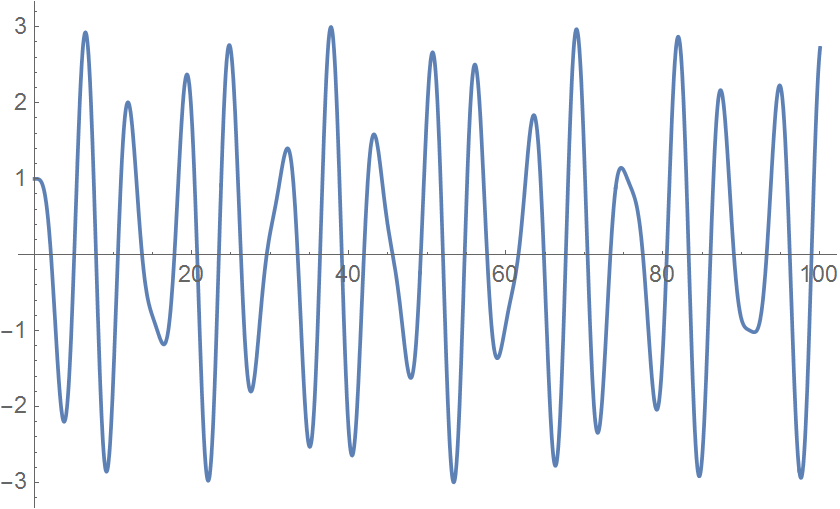

In [59]:
Plot[u, {t,0,100}]

**例:** $\ddot u(t) = -u(t) + \sin(\sqrt{2}\;t)$, $u(0)=1$, $\dot u(0)=0$ の解は

$$
u(t) = \cos t + \sqrt{2}\sin t - \sin(\sqrt{2}\;t).
$$

In [60]:
u = Cos[t] + Sqrt[2] Sin[t] - Sin[Sqrt[2] t];
u // TeXEq
u/.t->0 // TeXEq
D[u,t] // TeXEq
D[u,t]/.t->0 // TeXEq
D[u,t,t] + u // TeXEq

Out[61]:
 
 
 $$u=\sqrt{2} \sin (t)-\sin \left(\sqrt{2} t\right)+\cos (t)$$ 
 
 Out[62]:
 
 
 $$(u\text{/.}\, t\to 0)=1$$ 
 
 Out[63]:
 
 
 $$\frac{\partial u}{\partial t}=-\sin (t)+\sqrt{2} \cos (t)-\sqrt{2} \cos \left(\sqrt{2} t\right)$$ 
 
 Out[64]:
 
 
 $$\left(\frac{\partial u}{\partial t}\text{/.}\, t\to 0\right)=0$$ 
 
 Out[65]:
 
 
 $$\frac{\partial ^2u}{\partial t\, \partial t}+u=\sin \left(\sqrt{2} t\right)$$


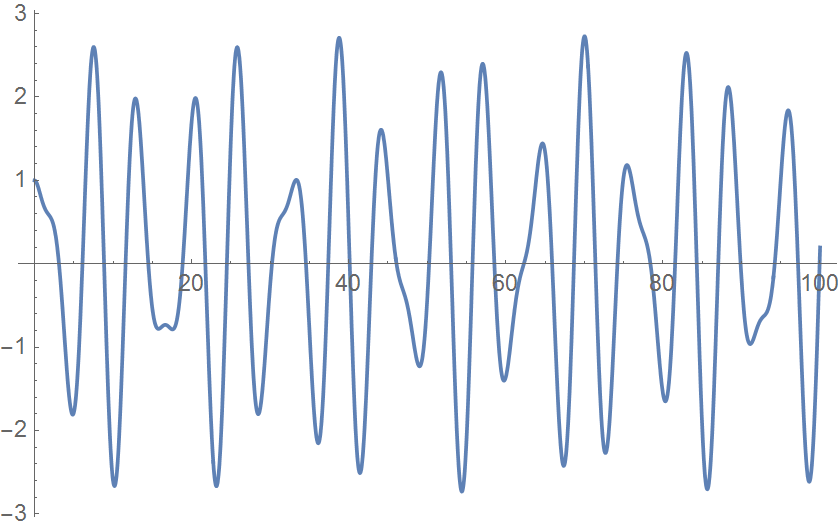

In [66]:
Plot[u, {t,0,100}]

**例:** $\ddot u(t) = -u(t) + \cos t$, $u(0)=1$, $\dot u(0)=0$ の解は

$$
u(t) = \cos t + \frac{t}{2}\sin t.
$$

In [67]:
u = Cos[t] + t/2 Sin[t];
u // TeXEq
u/.t->0 // TeXEq
D[u,t] // TeXEq
D[u,t]/.t->0 // TeXEq
D[u,t,t] + u // TeXEq

Out[68]:
 
 
 $$u=\frac{1}{2} t \sin (t)+\cos (t)$$ 
 
 Out[69]:
 
 
 $$(u\text{/.}\, t\to 0)=1$$ 
 
 Out[70]:
 
 
 $$\frac{\partial u}{\partial t}=\frac{1}{2} (t \cos (t)-\sin (t))$$ 
 
 Out[71]:
 
 
 $$\left(\frac{\partial u}{\partial t}\text{/.}\, t\to 0\right)=0$$ 
 
 Out[72]:
 
 
 $$\frac{\partial ^2u}{\partial t\, \partial t}+u=\cos (t)$$


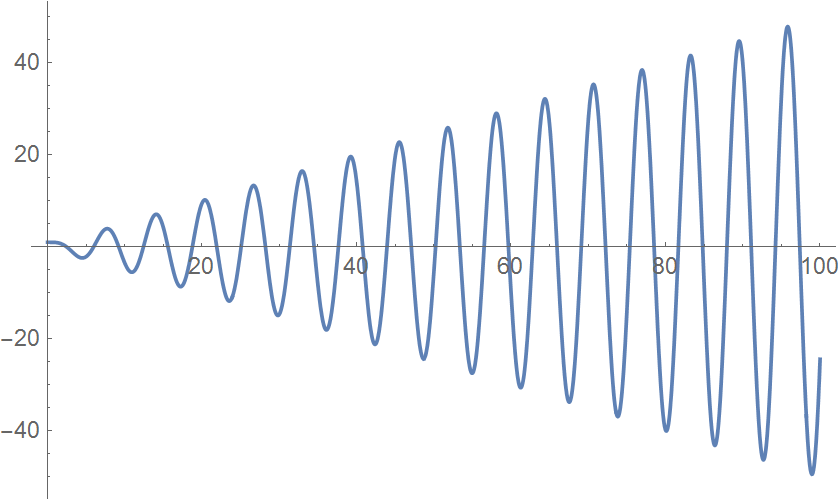

In [73]:
Plot[u, {t,0,100}]

**例:** $\ddot u(t) = -u(t) + \sin t$, $u(0)=1$, $\dot u(0)=0$ の解は

$$
u(t) = \cos t + \frac{1}{2}\sin t - \frac{t}{2}\cos t.
$$

これは以下のようにして求めることができる.

$$
u(t) = a\cos t + b\sin t + c\;t\cos t + d\;t\sin t
$$

とおくと,

$$
\begin{aligned}
u(0) &= a,
\\
\dot u(t) &= -a\sin t + b\cos t + c(-t\sin t + \cos t) + d(t\cos t + \sin t),
\\
\dot u(0) &= b+c,
\\
\ddot u(t) &= -a\cos t - b\sin t + c(-t\cos t -2\sin t) + d(-t\sin t + 2\cos t)
\\ & =
-u(t) + 2d\cos t -2c\sin t.
\end{aligned}
$$

これと $\ddot u(t) = -u(t) + \sin t$, $u(0)=1$, $\dot u(0)=0$ を比較すれば, $a=1$, $d=0$, $c=-1/2$, $b=1/2$ を得る. 

In [74]:
u = Cos[t] + 1/2 Sin[t] - t/2 Cos[t];
u // TeX
u/.t->0 // TeXEq
D[u,t] // TeXEq
D[u,t]/.t->0 // TeXEq
D[u,t,t] + u // TeXEq

Out[75]:
 
 
 $$\frac{\sin (t)}{2}-\frac{1}{2} t \cos (t)+\cos (t)$$ 
 
 Out[76]:
 
 
 $$(u\text{/.}\, t\to 0)=1$$ 
 
 Out[77]:
 
 
 $$\frac{\partial u}{\partial t}=\frac{1}{2} (t-2) \sin (t)$$ 
 
 Out[78]:
 
 
 $$\left(\frac{\partial u}{\partial t}\text{/.}\, t\to 0\right)=0$$ 
 
 Out[79]:
 
 
 $$\frac{\partial ^2u}{\partial t\, \partial t}+u=\sin (t)$$


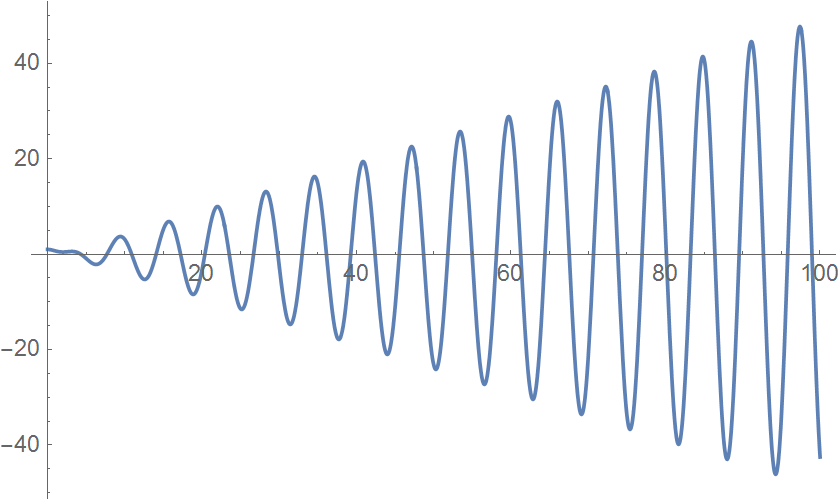

In [80]:
Plot[u, {t,0,100}]

#### 共振再論

$\alpha,\omega\ne 0$ であるとし, $\d = d/dt$ とおく.

前節のまとめは, 定数係数微分方程式

$$
\ddot u(t) + \omega^2 u(t) = A\cos(\alpha t) + B\sin(\alpha t)
\tag{$*$}
$$

の解が次の微分方程式の解になることを意味している:

$$
(\d^2+\omega^2)(\d^2+\alpha^2)u(t) = 0.
\tag{$**$}
$$

$\omega^2\ne\alpha^2$ の場合には($**$)の解全体のなすベクトル空間の基底として, 

$$
\cos(\omega t), \quad \sin(\omega t), \quad
\cos(\alpha t), \quad \sin(\alpha t)
$$

が取れ, $\omega^2=\alpha^2$ の場合には($**$)の解全体のなすベクトル空間の基底として, 

$$
\cos(\omega t), \quad \sin(\omega t), \quad
t\cos(\omega t), \quad t\sin(\omega t)
$$

が取れるのであった.

この一致は偶然であろうか? もちろんそうではない. そのことを以下で説明しよう.

方程式($*$)の左辺は $(\d^2+\omega^2)u(t)$ と書け, 右辺は微分方程式 $(\d^2+\alpha^2)v(t)=0$ の解なので, 方程式($*$)の解 $u(t)$ から

$$
(\d^2+\omega^2)u(t) = v(t), \quad
(\d^2+\alpha^2)v(t) = 0
$$

の解 $u(t),v(t)$ が得られる. 前者を後者に代入すると($**$)が得られる. これで, ($*$)の解は($**$)の解になっていることが分かった.

最初からこのように考えていれば($*$)の解が前節のまとめのように記述されることはほぼ自明になっていたはずである.

## 非斉次な波動方程式 (より高級な話題)

この節の内容は先走った内容になっているので, 初めて読む読者は飛ばしてよい. 後で必要になってから戻って来ても遅くない.  しかし, 筆者的には実用的な内容を含んでいるので計算を追ってみて欲しいと思う.

**ポイント:** 非斉次な調和振動子は本質的に非斉次な波動方程式の空間方向のFourier変換になっている. 非斉次な調和振動子が完全に解けているので, その逆Fourier変換によって非斉次な波動方程式も完全に解けてしまうことになる. $\QED$

### 解の表示

$u=u(t,x)$ に関する次の方程式を非斉次な波動方程式の初期値問題と呼ぶ:

$$
u_{tt}(t,x) = u_{xx}(t,x) + f(t,x), \quad u(0,x)=a(x), \quad u_t(0,x)=b(x).
$$

これの解は次のように書ける:

$$
u(t,x) = \frac{a(x+t)+a(x-t)}{2} + 
\frac{1}{2}\int_{x-t}^{x+t} b(y)\,dy +
\frac{1}{2}\int_0^t ds\,\int_{x-(t-s)}^{x+(t-s)} f(s,y)\,dy.
\tag{$*$}
$$

これが実際に上の条件を満たしていることは直接的に確認できる:

$$
\begin{aligned}
u(0,x) &= a(x),
\\
u_t(t,x) &= \frac{a'(x+t)-a'(x-t)}{2} +
\frac{b(x+t)+b(x-t)}{2} 
\\ &+ 
\int_0^t\frac{f(s,x+(t-s))+f(s,x-(t-s))}{2}\,ds,
\\
u_t(0,x) &= b(x),
\\
u_{tt}(t,x) &= \frac{a''(x+t)+a''(x-t)}{2} +
\frac{b'(x+t)-b'(x-t)}{2} 
\\ &+ 
\int_0^t\frac{f'(s,x+(t-s))-f'(s,x-(t-s))}{2}\,ds + f(t,x),
\\
u_x(t,x) &= \frac{a'(x+t)+a'(x-t)}{2} +
\frac{b(x+t)-b(x-t)}{2} 
\\ &+ 
\int_0^t\frac{f(s,x+(t-s))-f(s,x-(t-s))}{2}\,ds,
\\
u_{xx}(t,x) &= \frac{a''(x+t)+a''(x-t)}{2} +
\frac{b'(x+t)-b'(x-t)}{2} 
\\ &+ 
\int_0^t\frac{f'(s,x+(t-s))-f'(s,x-(t-s))}{2}\,ds.
\end{aligned}
$$

ゆえに $u_{tt}(t,x) = u_{xx}(t,x) + f(t,x)$.

In [81]:
Clear[a,b,f,s,t,x,y]
u = (a[x+t]+a[x-t])/2 + (1/2) Integrate[b[y],{y,x-t,x+t}] + (1/2) Integrate[Integrate[f[s,y],{y,x-(t-s),x+(t-s)}],{s,0,t}];
u // TeXRaw["u=",#]&
u/.t->0 // TeXRaw["u(0,x) = ", #]&
D[u,t] // TeXRaw["u_t = ",#]&
D[u,t]/.t->0 // TeXRaw["u_t(0,x) =", #]&
utt = D[u,{t,2}];
utt // TeXRaw["u_{tt} = ", #]&
uxx = D[u,{x,2}];
uxx // TeXRaw["u_{xx} = ", #]&
utt - uxx// TeXRaw["u_{tt}-u_{xx}=", # // Simplify]&

Out[83]:
 
 
 $$u=\frac{1}{2} \int_0^t \left(\int_{s-t+x}^{-s+t+x} f(s,y) \, dy\right) \, ds+\frac{1}{2} (a(x-t)+a(t+x))+\frac{1}{2} \int_{x-t}^{t+x} b(y) \, dy$$ 
 
 Out[84]:
 
 
 $$u(0,x) = a(x)$$ 
 
 Out[85]:
 
 
 $$u_t = \frac{1}{2} \int_0^t (f(s,s-t+x)+f(s,-s+t+x)) \, ds+\frac{1}{2} \left(a'(t+x)-a'(x-t)\right)+\frac{1}{2} (b(x-t)+b(t+x))$$ 
 
 Out[86]:
 
 
 $$u_t(0,x) =b(x)$$ 
 
 Out[88]:
 
 
 $$u_{tt} = \frac{1}{2} \left(\int_0^t \left(f^{(0,1)}(s,-s+t+x)-f^{(0,1)}(s,s-t+x)\right) \, ds+2 f(t,x)\right)+\frac{1}{2} \left(a''(x-t)+a''(t+x)\right)+\frac{1}{2} \left(b'(t+x)-b'(x-t)\right)$$ 
 
 Out[90]:
 
 
 $$u_{xx} = \frac{1}{2} \int_0^t \left(f^{(0,1)}(s,-s+t+x)-f^{(0,1)}(s,s-t+x)\right) \, ds+\frac{1}{2} \left(a''(x-t)+a''(t+x)\right)+\frac{1}{2} \left(b'(t+x)-b'(x-t)\right)$$ 
 
 Out[91]:
 
 
 $$u_{tt}-u_{xx}=f(t,x)$$

それでは天下りに与えた解の表示($*$)はどのようにして発見できるであろうか?

非斉次な波動方程式を $x$ についてFourier変換すれば前節の非斉次な調和振動子に帰着し, 逆Fourier変換でもとに戻せば解の表示($*$)が得られる. 以下の節では実際にそれを実行してみよう.

### Fourier変換に関する公式

その絶対値およびその導函数の絶対値などが $|x|\to\infty$ で十分速く減少する函数 $f(x)$ について

$$
\mathscr{F}[f](\omega) = \hat{f}(\omega) = \int_{-\infty}^\infty e^{-i\omega x}f(x)\,dx
$$

でFourier変換 $\hat{f}(\omega)$ を定義すると, 逆変換によって $\hat{f}(\omega)$ から $f(x)$ が得られる:

$$
f(x) = \frac{1}{2\pi}\int_{-\infty}^\infty e^{i\omega x}\hat{f}(\omega)\,d\omega.
$$

部分積分によって, 

$$
\mathscr{F}[f'](\omega) = 
\int_{-\infty}^\infty e^{-i\omega x}f'(x)\,dx = -
\int_{-\infty}^\infty (e^{-i\omega x})' f(x)\,dx = i\omega\hat{f}(\omega).
$$

ゆえに

$$
\mathscr{F}[f''](\omega) = -\omega^2\hat{f}(\omega).
\tag{1}
$$

簡単のため $t>0$ とする.  $f(x)$ が

$$
f(x) = \frac{1}{2}\chi_{[-t,t]}(x) =
\begin{cases}
1/2 & (-t\leqq x\leqq t) \\
0 & (\text{otherwise})
\end{cases}
$$

のとき, 

$$
\hat{f}(\omega) = \frac{1}{2}\int_{-t}^t e^{-i\omega x}\,dx = \frac{\sin(\omega t)}{\omega}
$$

なので

$$
\frac{1}{2}\chi_{[-t,t]}(x) =
\frac{1}{2\pi}\int_{-\infty}^\infty e^{i\omega x}\frac{\sin(\omega t)}{\omega}\,d\omega.
$$

これの両辺の $x$ に $x-y$ を代入し, $f(y)$ をかけて $y$ について積分すると, 

$$
\frac{1}{2}\int_{x-t}^{x+t} f(y)\,dy =
\frac{1}{2\pi}\int_{-\infty}^\infty e^{i\omega x}\frac{\sin(\omega t)}{\omega}\hat{f}(\omega)\,d\omega.
\tag{2}
$$

これの両辺を $t$ で微分すると

$$
\frac{f(x+t)+f(x-t)}{2} = 
\frac{1}{2\pi}\int_{-\infty}^\infty e^{i\omega x}\cos(\omega t)\hat{f}(\omega)\,d\omega.
\tag{3}
$$


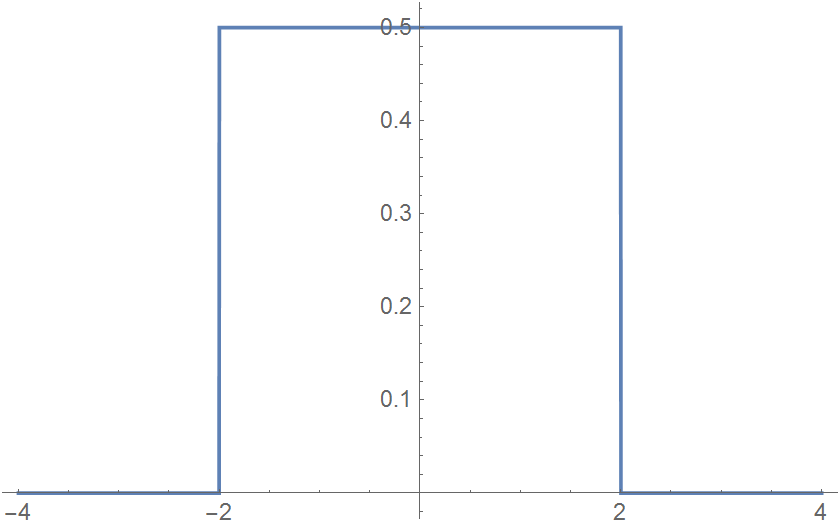

In [92]:
Plot[(HeavisidePi[x/(2t)]/2)/.t->-2, {x,-4,4}, Exclusions->None]

In [93]:
Sqrt[2 Pi] FourierTransform[HeavisidePi[x/(2t)]/2, x, omega] // TeXEq

$$\sqrt{2 \pi } \left(\mathcal{F}_x\left[\frac{\Pi \left(\frac{x}{2 t}\right)}{2}\right](\omega )\right)=\left| t\right| \text{sinc}(\omega t)$$

In [94]:
1/Sqrt[2 Pi] InverseFourierTransform[Abs[t] Sinc[omega t], omega, x] // TeXEq

$$\frac{\mathcal{F}_{\omega }^{-1}[\left| t\right| \text{sinc}(\omega t)](x)}{\sqrt{2 \pi }}=\frac{\text{sgn}(t-x)+\text{sgn}(t+x)}{4 \text{sgn}(t)}$$


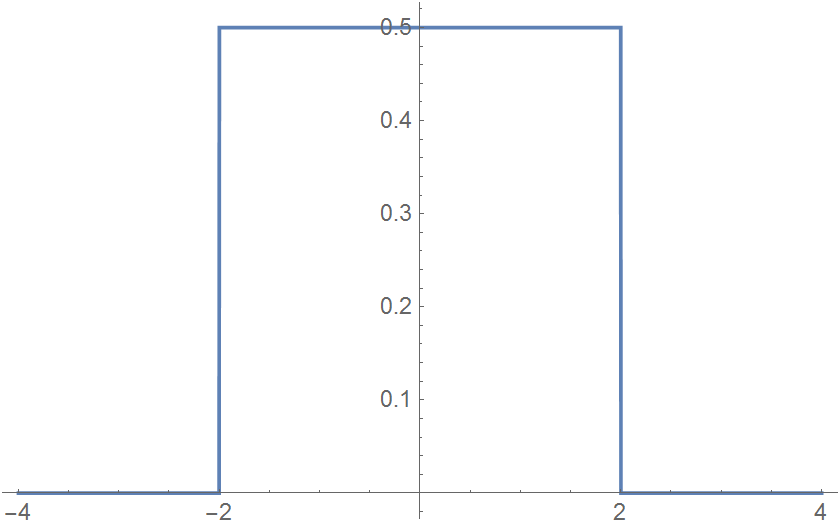

In [95]:
F = 1/Sqrt[2 Pi] InverseFourierTransform[Abs[t] Sinc[omega t], omega, x];
Plot[F/.t->-2, {x,-4,4}]

### 非斉次な波動方程式のFourier変換による解法

非斉次な波動方程式の初期値問題

$$
u_{tt}(t,x) = u_{xx}(t,x) + f(t,x), \quad u(0,x)=a(x), \quad u_t(0,x)=b(x)
$$

は(1)より

$$
\hat{u}_{tt}(t,\omega) = -\omega^2\hat{u}_{xx}(t,\omega) + \hat{f}(t,\omega),
\quad \hat{u}(t,\omega)=\hat{a}(\omega), \quad \hat{u}_t(0,x)=\hat{b}(\omega).
$$

と書き直される. これは非斉次な調和振動子である. ゆえに次のように解ける:

$$
\hat{u}(t,\omega) = 
\hat{a}(\omega)\cos(\omega t) +
\hat{b}(\omega)\frac{\sin(\omega t)}{\omega} +
\int_0^t \frac{\sin(\omega(t-s))}{\omega}\hat{f}(s,\omega)\,ds.
$$

この等式の両辺に $e^{i\omega x}$ をかけて $\omega$ について積分して $2\pi$ で割ると, (2),(3)より,

$$
u(t,x) =
\frac{a(x+t)+a(x-t)}{2} +
\frac{1}{2}\int_{x-t}^{x+t} b(y)\, dy +
\frac{1}{2}\int_0^t ds\int_{x-(t-s)}^{x+(t-s)} f(s,y)\,dy.
$$

これが欲しい解の表示であった. 

特に斉次の場合の通常の波動方程式の初期値問題の解は

$$
u(t,x) =
\frac{a(x+t)+a(x-t)}{2} +
\frac{1}{2}\int_{x-t}^{x+t} b(y)\, dy
$$

と書ける. これは $B(x)=\int b(x)\,dx$, $f(x)=(a(x)+B(x))/2$, $g(x)=(a(x)-B(x))/2$ とおくと, 

$$
u(t,x) = f(x+t) + g(x-t)
$$

と書き直される. これが $u_{tt}=u_{xx}$ を満たしていることを確認することは易しい.